<h2><b>Input : </b></h2>

*   train_microarray.csv
*   test_microarray.csv
*   suspect.csv
* rf1_features.pkl
* rf2_features.pkl
* rf3_features.pkl
* rf1_model.pkl
* rf2_model.pkl
* rf3_model.pkl

<h2><b>Output : </b></h2>

*   test_microarray_prediksi_rf.csv
*   suspect_prediksi_rf.csv

# Run All

## Import dan Load

Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import joblib

Load data

In [ ]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1MiU_0V6-LvZ_CyCuWf2HoW-WXNKSIFJQ')
df_test = pd.read_csv('https://drive.google.com/uc?id=1G-TSwysKHqTcXl0GERkf3cXKUtBrJ1Yc')
df_suspect = pd.read_csv('https://drive.google.com/uc?id=1r8oGfgJ3RTxRZSlU7pcYkBbq2ATOoRVP')

Load hasil seleksi fitur

In [ ]:
rf1_features = joblib.load('rf1_features.pkl')
rf2_features = joblib.load('rf2_features.pkl')
rf3_features = joblib.load('rf3_features.pkl')

Load hyperparameter tuning

In [ ]:
rf1_model = joblib.load('rf1_model.pkl')
rf2_model = joblib.load('rf2_model.pkl')
rf3_model = joblib.load('rf3_model.pkl')

Mengambil fitur dari df_train awal

In [ ]:
df_train1 = df_train[rf1_features]
df_train2 = df_train[rf2_features]
df_train3 = df_train[rf3_features]

Mengambil fitur dari df_test awal

In [ ]:
df_test1 = df_test[rf1_features]
df_test2 = df_test[rf2_features]
df_test3 = df_test[rf3_features]

Mengambil fitur dari df_suspect

In [ ]:
df_suspect1 = df_suspect[rf1_features[:-1]]
df_suspect2 = df_suspect[rf2_features[:-1]]
df_suspect3 = df_suspect[rf3_features[:-1]]

### Contoh Data Train

In [ ]:
df_train1.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,217022_s_at,214395_x_at,206835_at,221872_at,202435_s_at,205749_at,218541_s_at,205382_s_at,217028_at,Label
0,2.535743,2.457776,2.052387,2.873506,2.285882,2.518572,2.656989,2.833421,2.448979,1.982433,...,3.326183,2.223289,2.172511,3.372939,1.817986,2.344495,2.008092,2.665495,2.582746,1
1,2.587822,2.408562,1.957657,2.779933,2.248177,2.508590,2.366057,2.871436,2.460372,2.139794,...,2.215997,2.310986,2.492978,3.166555,2.619466,2.850630,1.712133,2.541161,2.461546,1
2,2.529666,2.447706,2.059190,2.805088,2.255567,2.658405,2.542071,2.871085,2.435954,2.113104,...,2.428886,2.309818,2.180694,2.794188,2.300764,2.624524,1.660744,2.496869,2.621770,0
3,2.274739,2.537130,2.273920,2.952965,2.554384,2.736684,2.465318,2.988069,2.551221,2.204011,...,3.321267,2.512591,2.043120,2.743884,1.905358,2.407280,1.582201,2.669755,2.206625,0
4,2.551101,2.692597,2.321532,2.887101,2.752609,2.752873,2.608392,3.098642,2.643402,2.483343,...,3.044343,2.416892,2.009510,2.612371,1.929459,2.500476,1.830177,2.895747,2.974692,0


In [ ]:
df_train1.shape

(130, 301)

### Contoh Data Test

In [ ]:
df_test1.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,217022_s_at,214395_x_at,206835_at,221872_at,202435_s_at,205749_at,218541_s_at,205382_s_at,217028_at,Label
0,2.522052,2.734353,2.503071,2.833083,2.905310,2.861828,2.513210,3.224710,2.705712,1.864313,...,2.711916,2.639105,2.090198,3.083715,2.100430,2.481651,1.772674,3.048133,2.286263,0
1,2.529361,2.340690,2.043689,2.729539,2.276008,2.508054,2.776756,2.837544,2.624152,1.974100,...,3.094587,2.210177,1.931578,3.260034,1.795092,2.285975,2.131319,2.648631,2.513521,1
2,2.383285,2.760980,2.557625,2.992440,2.949728,2.925960,2.637554,3.215604,2.608863,2.126646,...,2.565371,2.808035,1.880459,2.686703,1.853020,2.467939,1.790829,2.802343,2.131134,1
3,2.642286,2.468361,2.047078,2.834506,2.434371,2.548282,2.529123,2.895243,2.634816,2.054124,...,2.570787,2.277749,2.055436,3.202633,1.730806,2.274817,2.458880,2.640652,2.263108,1
4,2.406230,2.614403,2.275517,3.065341,2.827774,2.847275,2.353981,3.153981,2.731633,2.104720,...,2.706017,2.366307,1.962940,2.976508,2.250387,2.292197,1.993056,2.572407,3.070744,0


In [ ]:
df_test1.shape

(57, 301)

### Suspect

In [ ]:
df_suspect1

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,206998_x_at,217022_s_at,214395_x_at,206835_at,221872_at,202435_s_at,205749_at,218541_s_at,205382_s_at,217028_at
0,2.256059,2.770134,2.559232,2.904486,2.924660,2.958922,2.558358,3.202525,2.741908,1.645253,...,2.570962,3.042804,2.609337,2.210259,2.494553,1.975153,2.530297,1.750616,3.098158,2.183076
1,2.476502,2.564952,2.484916,2.435804,2.751464,2.922157,2.513460,3.176072,2.665992,1.737874,...,2.859226,2.446501,2.662567,2.350769,2.507582,2.147601,2.639203,1.598737,2.871269,2.135437
2,2.516803,2.872871,2.352785,2.557198,2.925518,3.073885,2.543978,3.295611,2.643493,2.022472,...,2.736173,2.244948,2.432493,2.293260,2.815154,2.111180,2.626987,1.677859,2.592177,2.186431
3,2.499117,2.813643,2.559049,2.656475,2.763619,2.878468,2.592949,3.184148,2.670018,1.811895,...,2.842630,2.902077,2.636131,2.311065,2.472948,2.034676,2.572015,1.654103,2.998207,2.143887
4,2.411571,2.756731,2.453675,2.912560,2.780565,2.861779,2.491120,3.130010,2.666348,2.357249,...,2.830770,2.802077,3.012509,2.326602,2.423827,2.101394,2.770397,1.555975,2.968291,1.992728


In [ ]:
df_suspect1.shape

(5, 300)

## X_train, y_train, X_test, y_test

X_train

In [ ]:
X_train1 = df_train1.iloc[:,:-1]
X_train2 = df_train2.iloc[:,:-1]
X_train3 = df_train3.iloc[:,:-1]

y_train

In [ ]:
y_train1 = df_train1.iloc[:,-1]
y_train2 = df_train2.iloc[:,-1]
y_train3 = df_train3.iloc[:,-1]

X_test

In [ ]:
X_test1 = df_test1.iloc[:,:-1]
X_test2 = df_test2.iloc[:,:-1]
X_test3 = df_test3.iloc[:,:-1]

y_test

In [ ]:
y_test1 = df_test1.iloc[:,-1]
y_test2 = df_test2.iloc[:,-1]
y_test3 = df_test3.iloc[:,-1]

## Validasi

### RF1

Fit model

In [ ]:
rf1_model.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=9, min_samples_split=4)

Hasil prediksi dengan data train

In [ ]:
rf1_val = rf1_model.predict(X_train1)
print("Accuracy : ", metrics.accuracy_score(y_train1, rf1_val))
print("Precision: ", metrics.precision_score(y_train1, rf1_val))
print("Recall   : ", metrics.recall_score(y_train1, rf1_val))
print("F1 Score : ", metrics.f1_score(y_train1, rf1_val))

Accuracy :  1.0
Precision:  1.0
Recall   :  1.0
F1 Score :  1.0


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

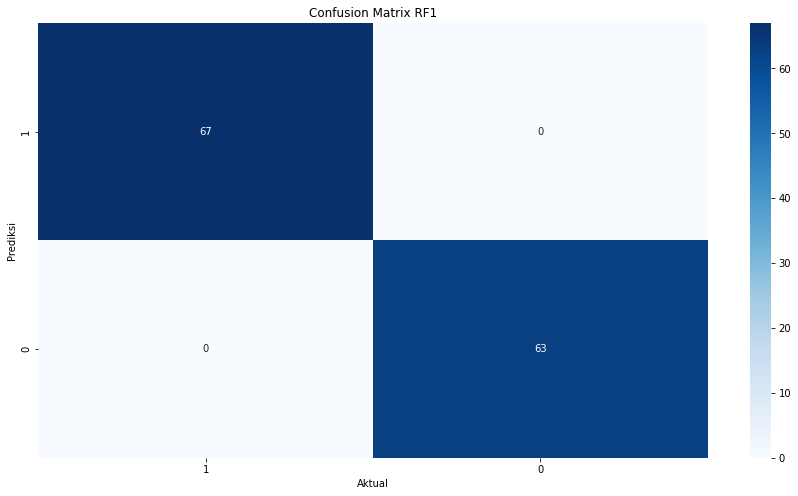

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train1, rf1_val, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi dengan data test

In [ ]:
rf1_prediksi = rf1_model.predict(X_test1)
print("Accuracy : ", metrics.accuracy_score(y_test1, rf1_prediksi))
print("Precision: ", metrics.precision_score(y_test1, rf1_prediksi))
print("Recall   : ", metrics.recall_score(y_test1, rf1_prediksi))
print("F1 Score : ", metrics.f1_score(y_test1, rf1_prediksi))

Accuracy :  0.7368421052631579
Precision:  0.7142857142857143
Recall   :  0.8333333333333334
F1 Score :  0.7692307692307692


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

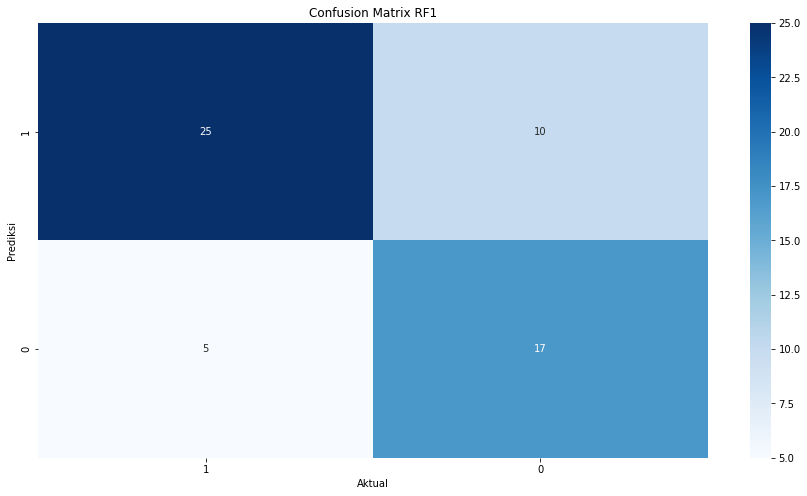

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test1, rf1_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### RF2

Fit model

In [ ]:
rf2_model.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=50)

Hasil prediksi dengan data train

In [ ]:
rf2_val = rf2_model.predict(X_train2)
print("Accuracy : ", metrics.accuracy_score(y_train2, rf2_val))
print("Precision: ", metrics.precision_score(y_train2, rf2_val))
print("Recall   : ", metrics.recall_score(y_train2, rf2_val))
print("F1 Score : ", metrics.f1_score(y_train2, rf2_val))

Accuracy :  0.9923076923076923
Precision:  0.9852941176470589
Recall   :  1.0
F1 Score :  0.9925925925925926


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

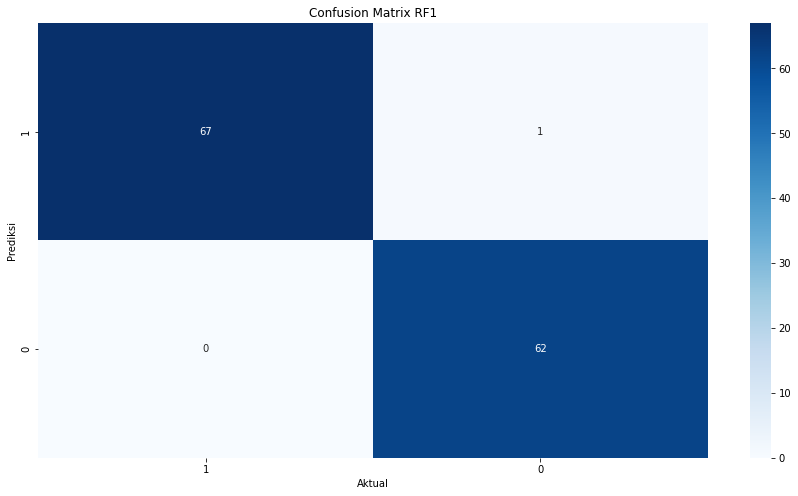

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train2, rf2_val, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi dengan data test

In [ ]:
rf2_prediksi = rf2_model.predict(X_test2)
print("Accuracy : ", metrics.accuracy_score(y_test2, rf2_prediksi))
print("Precision: ", metrics.precision_score(y_test2, rf2_prediksi))
print("Recall   : ", metrics.recall_score(y_test2, rf2_prediksi))
print("F1 Score : ", metrics.f1_score(y_test2, rf2_prediksi))

Accuracy :  0.7192982456140351
Precision:  0.7058823529411765
Recall   :  0.8
F1 Score :  0.7500000000000001


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

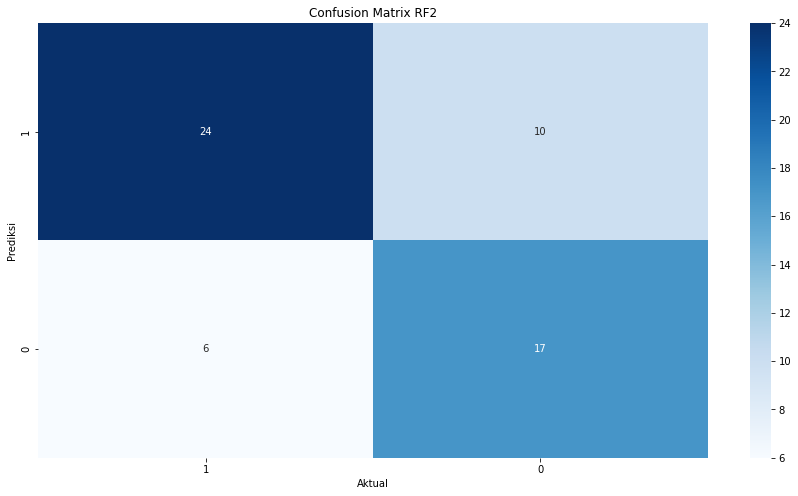

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test2, rf2_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF2') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### RF3

Fit model

In [ ]:
rf3_model.fit(X_train3, y_train3)

RandomForestClassifier(n_estimators=50)

Hasil prediksi dengan data train

In [ ]:
rf3_val = rf3_model.predict(X_train3)
print("Accuracy : ", metrics.accuracy_score(y_train3, rf3_val))
print("Precision: ", metrics.precision_score(y_train3, rf3_val))
print("Recall   : ", metrics.recall_score(y_train3, rf3_val))
print("F1 Score : ", metrics.f1_score(y_train3, rf3_val))

Accuracy :  1.0
Precision:  1.0
Recall   :  1.0
F1 Score :  1.0


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

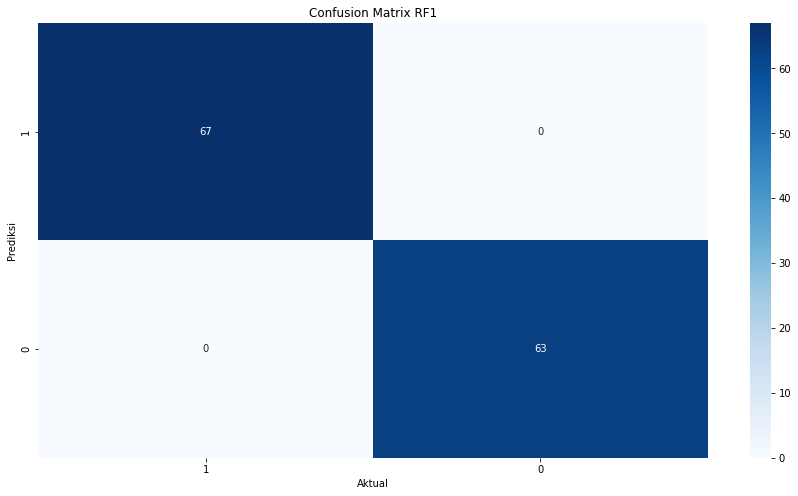

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train3, rf3_val, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Prediksi dengan data test

In [ ]:
rf3_prediksi = rf3_model.predict(X_test3)
print("Accuracy : ", metrics.accuracy_score(y_test3, rf3_prediksi))
print("Precision: ", metrics.precision_score(y_test3, rf3_prediksi))
print("Recall   : ", metrics.recall_score(y_test3, rf3_prediksi))
print("F1 Score : ", metrics.f1_score(y_test3, rf3_prediksi))

Accuracy :  0.7719298245614035
Precision:  0.7297297297297297
Recall   :  0.9
F1 Score :  0.8059701492537312


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

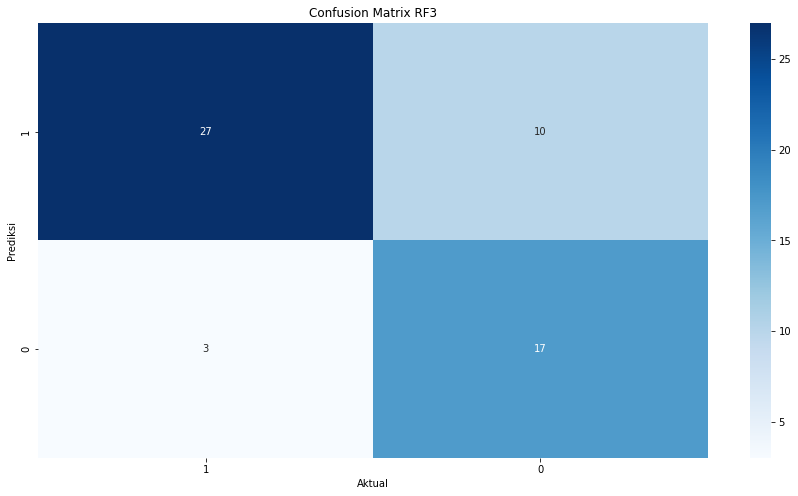

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test3, rf3_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix RF3') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Export

### Data Test

Label data test dengan hasil prediksi pada masing-masing model

In [ ]:
test_microarray_prediksi = y_test1.to_frame()
test_microarray_prediksi['RF1'] = rf1_prediksi.astype('int')
test_microarray_prediksi['RF2'] = rf2_prediksi.astype('int')
test_microarray_prediksi['RF3'] = rf3_prediksi.astype('int')
test_microarray_prediksi

,Label,RF1,RF2,RF3
0,0,1,1,1
1,1,1,1,1
2,1,0,0,0
3,1,1,1,1
4,0,0,0,1
5,0,0,0,0
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


Export ke CSV

In [ ]:
test_microarray_prediksi.to_csv(r'test_microarray_prediksi_rf.csv', index=False, header=True)

### Suspect

Fit model

In [ ]:
rf1_model.fit(X_train1, y_train1)
rf2_model.fit(X_train2, y_train2)
rf3_model.fit(X_train3, y_train3)

RandomForestClassifier(n_estimators=50)

Prediksi dengan Suspect

In [ ]:
rf1_prediksi_suspect = rf1_model.predict(df_suspect1).astype('int')
rf2_prediksi_suspect = rf2_model.predict(df_suspect2).astype('int')
rf3_prediksi_suspect = rf3_model.predict(df_suspect3).astype('int')

Melihat hasil prediksi masing-masing model

In [ ]:
calon_dataframe = {'RF1' : rf1_prediksi_suspect,
                   'RF2' : rf2_prediksi_suspect,
                   'RF3' : rf3_prediksi_suspect}
suspect_prediksi = pd.DataFrame(calon_dataframe)
suspect_prediksi

,RF1,RF2,RF3
0,0,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,0,1,1


Export ke CSV

In [ ]:
suspect_prediksi.to_csv(r'suspect_prediksi_rf.csv', index=False, header=True)